In [2]:
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import optimizers
import numpy as np; import sys; import os; from time import time

In [3]:
from keras.datasets import fashion_mnist
(AX, AY), (QX, QY) = fashion_mnist.load_data()
AX=255-AX; QX=255-QX

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
nclasses = 10
AY2 = keras.utils.to_categorical(AY, nclasses) 
QY2 = keras.utils.to_categorical(QY, nclasses)

In [5]:
nl, nc = AX.shape[1], AX.shape[2] #28, 28
AX = (AX.astype('float32') / 255.0)-0.5 # -0.5 a +0.5
QX = (QX.astype('float32') / 255.0)-0.5 # -0.5 a +0.5
AX = np.expand_dims(AX,axis=3) 
QX = np.expand_dims(QX,axis=3)

In [6]:
model = Sequential() # 28x28
model.add(Conv2D(20, kernel_size=(5,5), activation='relu', input_shape=(nl, nc, 1) )) #20x24x24
model.add(MaxPooling2D(pool_size=(2,2))) #20x12x12
model.add(Conv2D(40, kernel_size=(5,5), activation='relu')) #40x8x8
model.add(MaxPooling2D(pool_size=(2,2))) #40x4x4
model.add(Dropout(0.25))
model.add(Flatten()) #640
model.add(Dense(200, activation='relu')) #200
model.add(Dense(nclasses, activation='softmax')) #10

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn1.png', show_shapes=True);
model.summary()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 40)          20040     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 40)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)        

In [8]:
opt=optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
t0=time()
model.fit(AX, AY2, batch_size=300, epochs=30, verbose=2)
t1=time(); print("Tempo de treino: %.2f s"%(t1-t0))

Epoch 1/30
600/600 - 25s - loss: 0.5318 - accuracy: 0.8075 - 25s/epoch - 41ms/step
Epoch 2/30
600/600 - 24s - loss: 0.3354 - accuracy: 0.8784 - 24s/epoch - 41ms/step
Epoch 3/30
600/600 - 25s - loss: 0.2831 - accuracy: 0.8969 - 25s/epoch - 41ms/step
Epoch 4/30
600/600 - 25s - loss: 0.2503 - accuracy: 0.9093 - 25s/epoch - 41ms/step
Epoch 5/30
600/600 - 24s - loss: 0.2289 - accuracy: 0.9164 - 24s/epoch - 41ms/step
Epoch 6/30
600/600 - 24s - loss: 0.2086 - accuracy: 0.9240 - 24s/epoch - 41ms/step
Epoch 7/30
600/600 - 24s - loss: 0.1911 - accuracy: 0.9301 - 24s/epoch - 41ms/step
Epoch 8/30
600/600 - 24s - loss: 0.1756 - accuracy: 0.9354 - 24s/epoch - 40ms/step
Epoch 9/30
600/600 - 24s - loss: 0.1631 - accuracy: 0.9402 - 24s/epoch - 41ms/step
Epoch 10/30
600/600 - 24s - loss: 0.1500 - accuracy: 0.9439 - 24s/epoch - 40ms/step
Epoch 11/30
600/600 - 24s - loss: 0.1359 - accuracy: 0.9488 - 24s/epoch - 40ms/step
Epoch 12/30
600/600 - 24s - loss: 0.1237 - accuracy: 0.9542 - 24s/epoch - 41ms/step
E

In [10]:
score = model.evaluate(QX, QY2, verbose=False)
print('Test loss: %.4f'%(score[0]))
print('Test accuracy: %.2f %%'%(100*score[1]))
print('Test error: %.2f %%'%(100*(1-score[1])))

Test loss: 0.4947
Test accuracy: 91.03 %
Test error: 8.97 %


In [24]:
predict = np.int32(model.predict(QX)>0.5)
QP = np.zeros(QY.shape)
for i in range(len(predict)):
    for j in range(len(predict[0])):
        if(predict[i,j] == 1):
            QP[i] = j
QP = np.int32(QP)

313/313 [==============================] - 1s 3ms/step


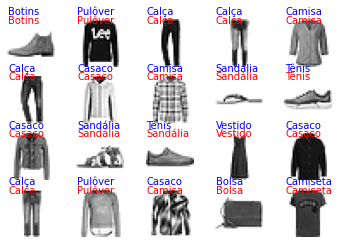

In [25]:
from matplotlib import pyplot as plt
categorias=["Camiseta", "Calça", "Pulôver", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Botins"]
f = plt.figure()
for i in range(20):
    f.add_subplot(4,5,i+1)
    plt.imshow( QX[i,:,:,0], cmap="gray", vmin=-0.5, vmax=+0.5)
    plt.axis("off");
    plt.text(0,-3,categorias[QY[i]],color="b")
    plt.text(0, 2,categorias[QP[i]],color="r")
plt.savefig("nomefigura.png")
plt.show()

In [13]:
t2=time()
QP2=model.predict(QX); QP=np.argmax(QP2,1)
t3=time(); print("Tempo de predicao: %.2f s"%(t3-t2))
nerro=np.count_nonzero(QP-QY); print("nerro=%d"%(nerro))

313/313 [==============================] - 2s 5ms/step
Tempo de predicao: 1.71 s
nerro=897
